In [32]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors as m2colors
import seaborn as sns
from pylab import cm
import plotly
import plotly.graph_objects as go

from datetime import datetime

import json
import os
import sys
import re

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/b/research/mechanical-memory/cell-mech-memory/../figures_v3/figureS5_soft/km_soft_kc_constant_activations_v1.png


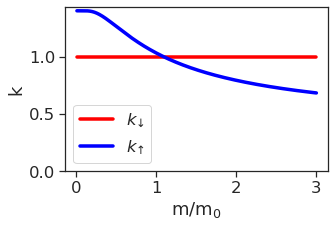

In [4]:
## figure 1
def plot_rates(params, ax=None):
    Nt = 500; 
    m = np.linspace(0.01,3,Nt); 
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(5,3.5))
    
    params['type'] = params['kc']
    kcplot = f_m(m, params)
    ax.plot(m/params['m0'], kcplot, color = 'red', linewidth=3.5, label='$k_{\u2193}$')

    params['type'] = params['km']
    kmplot = f_m(m, params)
    ax.plot(m/params['m0'], kmplot, color = 'blue', linewidth=3.5, label='$k_{\u2191}$')

#     ax.plot(m/params['m0'], kcplot + kmplot, color = 'green', linewidth=3.5, label='')

#     ax.plot([1., 1.], ax.get_ylim(), color = 'k', linestyle = '-.', linewidth=0.)
    ax.set_xlabel('m/m$_{0}$'); ax.set_ylabel('k')
    ax.set_ylim([0, ax.get_ylim()[1]])
    
    return fig, ax

params = {}
params['kc'] = 1. #'-stiff'
params['km'] = 'soft'
params['m0'] = 1.
params['g'] = 45

fig, ax = plot_rates(params)
ax.legend()
plt.tight_layout()

saveall = True
if saveall:
    direc = os.getcwd() + '/../figures_v3/figureS5_soft/'
#     direc = os.getcwd() + '/powerpoints/ppt_figs/'
    fname1 = direc + "km_soft_kc_constant_activations_v1.png"
    print(fname1)
    fig.savefig(fname1, format='png', dpi=600)


0.9454647191178356


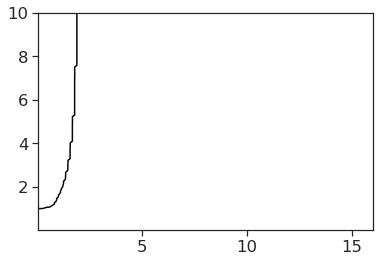

In [25]:
## figure 2 data cell
params = {}
params['kc'] = 1.3 # 0.5 #'soft' 1.
params['km'] = 'soft' #  0. # 'stiff' # 1. # 'stiff'
params['n'] = 6
params['m0'] = 1.
params['x0'] = 2.; 
params['a0'] = 1.; params['xtt'] = 0.
params['x_c'] = x_crit(params['n'])
params['g'] = 35
params['a_max'] = 15
params['grid_resolution'] = 150

print(params['x_c'])
m_space = np.linspace(0.01, 10, res)
x_space = np.linspace(0., 10., res)
a_space = np.linspace(0.01, 6.1, res)
# ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

a_c = alpha_crit(m_space, params)
m_c = scipy.optimize.fsolve(m_crit_general, 1.5, args=(params), xtol=1e-10)[0] / params['m0']
params['a_c'] = a_c.tolist(); params['m_c'] = m_c
params['m_space'] = m_space

mc_ind = np.where(np.abs(m_space/ params['m0'] - m_c) == np.amin(np.abs(m_space/ params['m0']-m_c)))[0][0]

# U_data, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax = collect_minima(m_space, x_space, a_space, params)
## full
# U_data, U_mins, x_arr_max, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax = collect_minima(U_old, m_space, x_space, a_space, params)

## dev
# U_data, U_mins, x_arr_max, _, _, _, _, _, _, _ = collect_minima(U_old, m_space, x_space, a_space, params)
# U_data, U_mins, x_arr_max, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax, barrier_heights = collect_minima(U, m_space, x_space, a_space, params)
mtst, x_cvals, lowlines, highlines = calc_PD_rates(params, display = False)

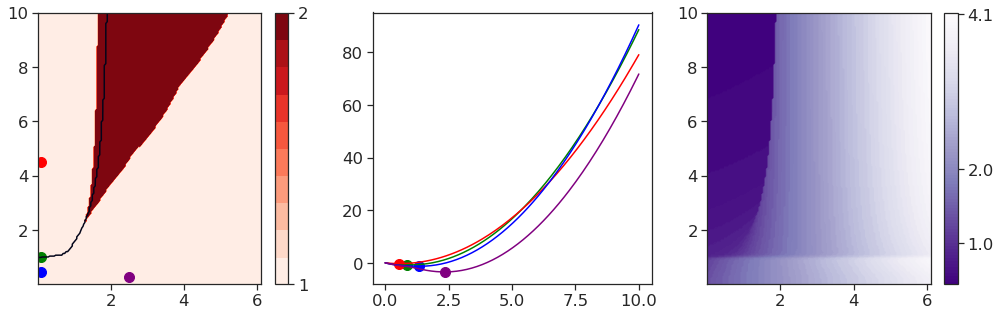

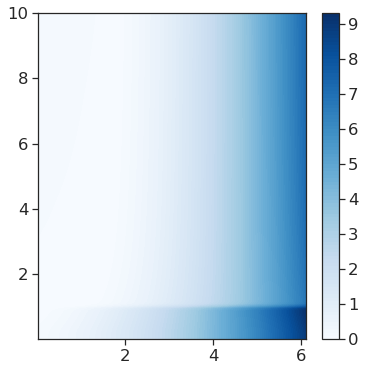

In [26]:
fig, ax = plt.subplots(1,3, figsize = (17, 5))
cf = ax[0].contourf(a_space, m_space/params['m0'], U_mins, levels=10, cmap=cm.Reds)
plt.colorbar(cf, ax=ax[0], ticks=(0,1,2))

choose_m = .99 * params['m0']
choose_m_ind = np.where(np.abs(m_space - choose_m) == np.amin(np.abs(m_space-choose_m)))[0][0]
choose_a = 1.8
choose_a_ind = np.where(np.abs(a_space - choose_a) == np.amin(np.abs(a_space-choose_a)))[0][0]

choose_m = [1., 4.5, .5, .3] # [1.3, 4., 4., 1.3, 1.3, 2.3]
choose_a = [.1, .1, .1, 2.5]
colors = ['green','red','blue','purple']
for mi, mm in enumerate(choose_m):

    aa = choose_a[mi]    
    choose_a_ind = np.where(np.abs(a_space - aa) == np.amin(np.abs(a_space - aa)))[0][0]
    choose_m_ind = np.where(np.abs(m_space - mm) == np.amin(np.abs(m_space - mm)))[0][0]    

    ax[0].scatter(a_space[choose_a_ind], m_space[choose_m_ind]/params['m0'],  s=100, c=colors[mi])
    ax[1].plot(x_space, U_data[choose_m_ind, :, choose_a_ind], color=colors[mi])
    
    umin = scipy.signal.argrelextrema(U_data[choose_m_ind, :, choose_a_ind], np.less)[0]
    ax[1].scatter(x_space[umin], U_data[choose_m_ind, umin, choose_a_ind], s=100, c=colors[mi])
#     ax[1].set_ylim([np.amin(U_data[choose_m_ind, :, choose_a_ind])*1.1, 2])

cs = ax[0].contour(a_space, m_space / params['m0'], x_arr_max, levels=[params['x_c']])
x_cvals = cs.allsegs[0][0]
# print(x_cvals)

####
cf2 = ax[2].contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
# ax[2].contour(a_space, m_space / params['m0'], x_arr_max, levels=[params['x_c']])
plt.colorbar(cf2, ax=ax[2], ticks=(0,1,2, np.round(np.amax(x_arr_max),1)), orientation='vertical')

fig2, ax2 = plt.subplots(1,1, figsize=(6,6))

cf3 = ax2.contourf(a_space, m_space / params['m0'], barrier_heights, levels=100, cmap=cm.Blues)
plt.colorbar(cf3, ax=ax2)

plt.show()

20.23775444089431
0.9454647191178356


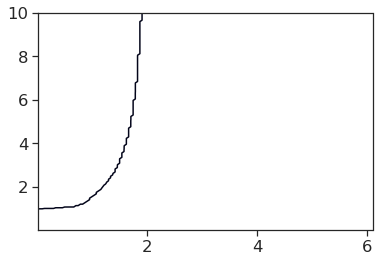

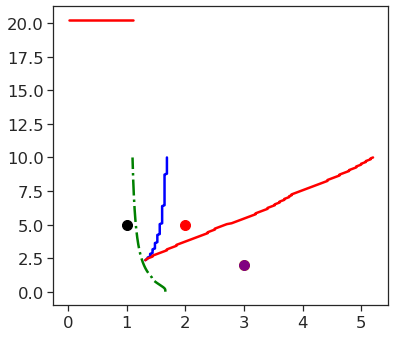

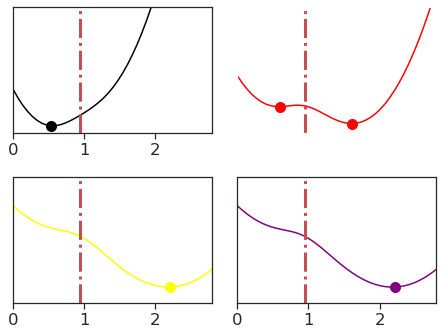

In [40]:
print(params['m_c'])
# print(params['a_c'])
print(params['x_c'])
cs = plt.contour(a_space, m_space / params['m0'], x_arr_max, levels=[params['x_c']])
x_cvals = cs.allsegs[0][0]
fig, ax = plt.subplots(1,1, figsize=(6, 5.5))

# first order
ax.plot(capture2minima, np.array(capture_mvals) /params['m0'], color='blue', linewidth=2.5)
# first order
ax.plot(capmax, np.array(capture_mvals) /params['m0'], color='red', linewidth=2.5)
# second order
ax.plot(a_c, m_space/params['m0'], color='green', linewidth=2.5, linestyle = '-.')
# second order
ax.plot([np.amin(a_space), a_c[mc_ind]],[m_c, m_c], color='red', linewidth=2.5)
# ax.set_xlim([0., 3.5])


gfig = plot_PD_rates_soft(lowlines, highlines, m_space, a_space, params)
# gfig = plot_PD_rates(capture2minima, capmax, capture_mvals, x_cvals, m_space, a_space, params)

fig2, ax2 = plt.subplots(2, 2, figsize=(6.5, 5))

choose_m = [5., 5., 2., 2.] # [1.3, 4., 4., 1.3, 1.3, 2.3]
choose_a = [1., 2., 3., 3.] #[1., 1., 2.5, 1.5, 2.5, 2.5]
colors = ['black','red','yellow','purple']

for mi, mm in enumerate(choose_m):
#     plotcounter = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    plotcounter = [(0,0), (0,1), (1,0), (1,1)]
    
    aa = choose_a[mi]    
    ax.scatter(aa, mm/params['m0'], s=100, color=colors[mi])
#     gfig.add_trace(go.Scatter(x=[aa], y=[mm/params['m0']],
#                     mode='markers', marker=dict(size=20, color=mcolors[colors[mi]]),
#                          )
#               )
    handle = ax2[plotcounter[mi]]
    
    choose_a_ind = np.where(np.abs(a_space - aa) == np.amin(np.abs(a_space - aa)))[0][0]
    choose_m_ind = np.where(np.abs(m_space - mm) == np.amin(np.abs(m_space - mm)))[0][0]
    
    Uslice = U_data[choose_m_ind, :, :].squeeze()
    m0coordsT = gmin_overm[choose_m_ind]
    m1coordsT = b1_overm[choose_m_ind]
    m2coordsT = b2_overm[choose_m_ind]

    handle.plot(x_space, Uslice[:,choose_a_ind], color=colors[mi]) # mcolors['red']
    xargs = scipy.signal.argrelextrema(Uslice[:,choose_a_ind], np.less)[0]      
    x_mins = x_space[xargs]
    handle.scatter(x_mins, Uslice[xargs, choose_a_ind], s=100, color=colors[mi], zorder=10) # color=mcolors['blueviolet']
    handle.set_ylim([np.amin([np.amin(Uslice[:,choose_a_ind])*1.2,-0.1]), .6])
    handle.set_xlim([0., 2.8])
    handle.set_yticks([])
    handle.plot([params['x_c'], params['x_c']], handle.get_ylim(), linestyle = '-.', linewidth = 3., color= 'r')
#     for xi, xx in enumerate(x_mins):
#         handle.text(0.1, 0.8 - 0.15*xi, ('x$_{n}$=%.2f' % xx), transform=handle.transAxes)
    if mi == 1:
        handle.spines['bottom'].set_color('white')
        handle.spines['left'].set_color('white')
        handle.spines['right'].set_color('white')
        handle.spines['top'].set_color('white')
        
        handle.xaxis.label.set_color('white')
        handle.tick_params(axis='x', colors='white')
        
        handle.yaxis.label.set_color('white')
        handle.tick_params(axis='y', colors='white')
        
gfig.show()

saveall = True
if saveall:
    for ki, kk in enumerate(params.keys()):
        if isinstance(params[kk], np.ndarray):
            params[kk] = params[kk].tolist()
#     params['m_space'] = params['m_space'].tolist()
    now = datetime.now().strftime("%m-%d-%Y_%H.%M")
    
    direc = os.getcwd() + '/../figures_v3/figureS5_soft/'
#     direc = os.getcwd() + '/powerpoints/ppt_figs/'
    fname1 = direc + "phase_diagram_rates_v1_"+now+".png"
    fname2 = direc + "phase_diagram_rates_snapshots_v1_"+now+".png"
#     fig.tight_layout()
    fig2.tight_layout()
#     fig.savefig(fname1, format='png', dpi=600)
    fig2.savefig(fname2, format='png', dpi=600, transparent=True)
    gfig.write_image(fname1, scale = 1.5, engine='kaleido')
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(params))

In [10]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = .6 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'soft'      
        params['m0'] = 6.5
        params['x0'] = 1.9; 
        params['a0'] = 1.; params['xtt'] = 0.
        params['g'] = 35
        params['n'] = 6.
        
        params['a_max'] = 10
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 150 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

# ins = np.array(
#     [
#         [24, 2.],
#         [72, 10.],
#         [360, 2.],
#     ]
#         )

ins = np.array(
    [
        [24, 2.],
        [172, 10.],
        [48, 2.],
        [48, 10.],
        [200, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 0.6, 'km': 'soft', 'm0': 6.5, 'x0': 1.9, 'a0': 1.0, 'xtt': 0.0, 'g': 35, 'n': 6.0, 'a_max': 10, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 150, 'TV0SR': 1.9, 'TV0SG': 1.9, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.0), 'grid_resolution': 150}
--------
a_c = 0.698858, x_c = 0.945465, m_c in absolute = 1292589658.326612
updated_exp


/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


m_c exit?198859947.43486342
{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 0.6, 'km': 'soft', 'm0': 6.5, 'x0': 1.9, 'a0': 1.0, 'xtt': 0.0, 'g': 35, 'n': 6.0, 'a_max': 10, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 150, 'TV0SR': 1.9, 'TV0SG': 1.9, 'dynamics': 'updated_exp', 'eps': <MMfxns.noise object at 0x7f2d66556400>, 'grid_resolution': 150, 'x_c': 0.9454647191178356, 'm_c': 198859947.43486342, 'a_c': array([1.01029659, 1.01029659, 1.01029659, 1.01029659, 1.01029657,
       1.01029639, 1.01029517, 1.01029003, 1.01027461, 1.01023805,
       1.01016508, 1.01003701, 1.00983332, 1.00953324, 1.00911727,
       1.00856816, 1.00787164, 1.00701669, 1.00599559, 1.00480374,
       1.00343939, 1.00190328, 1.00019824, 0.99832885, 0.99630104,
       0.99412182, 0.99179894, 0.98934071, 0.98675574, 0.98405281,
       0.98124072, 0.97832815, 0.97532362, 0.9722354 , 0.96907145,
       0.96583942, 0.96254657, 0.95919982, 0.95580569, 0.95237035,
       0.94889957, 0.945398

UnboundLocalError: local variable 'memory_mask' referenced before assignment

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(6.3,7.5), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if resultsDF['active_region'].values[-1] == 2:
#     print('blue')
    params['color'] = (0., 0., 1.)
    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
#     params['color'] = (212/255, 0., 0.)
elif 3 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
    fname1 = 'profiles_' + params['dynamics'] + "_temp_mem.png"
else:
#     print('pink')
    params['color'] = (1., 0., 1.)
    
    params['color'] = (102./255, 102./255, 102./255)
    fname1 = 'profiles_' + params['dynamics'] + "_no_mem.png"

params, fig, axs = plot_profile(fig, ax, resultsDF, params, x_equil, colors=['#f5793aff', '#1e88e5ff', '#0f2080ff'] )

# colors =  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']]
#  fig2,
params['input_m'].append(ins.tolist())

base_params = set_params()
base_params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

#     fname1 = 'profiles_' + params['dynamics'] + "_multi_program_mem.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(direc + fname1, format='png', dpi=600, transparent=True)
    
#     fname2 = 'PD_' + fname1
#     print(fname2)
#     fig2.savefig(direc + fname2, format='png', dpi=600)
#     params['eps'] = base_params['eps']
#     print([type(params[i]) for i in params.keys()])
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))

In [ ]:
# params = {}
# params = set_params()

x_space = np.linspace(0, 8., res)
a_space = np.linspace(0.01, 5., res)
params['x_c'] = x_crit(params['n'])
m_space = np.linspace(0.05, 11., res)
params['m_space'] = m_space
params['grid_resolution'] = 250

U_data, U_mins, x_arr_max, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax, barrier_heights = collect_minima(U, m_space, x_space, a_space, params)
mtst2, x_cvals, newlowlines, newhighlines = calc_PD_rates(params)

In [ ]:
#### figure 4 heat map of equilibrium value of x




# res = 200


# # ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

# a_c = alpha_crit(m_space, params)
# m_c = scipy.optimize.fsolve(m_crit_general, 1.5, args=(params), xtol=1e-10)[0] / params['m0']
# params['a_c'] = a_c.tolist(); params['m_c'] = m_c

# # x_space = np.linspace(0, 5., res)
# # m_space = np.linspace(0.05,params['m_c']*3,res) * params['m0']
# # a_space = np.linspace(0.01, params['a_c']*3, res)
# # print(np.amax(m_space))
# a_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space - a_c)))[0]

# U_data = np.zeros((len(x_space), len(a_space), len(m_space)))
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         for xi, xx in enumerate(x_space):
#             U_data[xi, ai, mi] = U(f_m, mm, xx, aa, params)

# x_arr_max = np.zeros((res,res))
# x_arr_min = np.zeros((res,res))
# m0coords = []; m1coords = []; m2coords = []
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         xargs = find_peaks(-np.abs(np.diff(U_data[:,ai,mi])))[0]
#         Utest = U_data[xargs,ai,mi]        
#         xmins = x_space[xargs]
        
#         if len(xmins) > 0:
#             x_arr_max[mi, ai] = xmins[np.argmin(Utest)]
#             x_arr_min[mi, ai] = np.amin(xmins) # xmins[np.argmin(Utest)]
#         else:
#             try:
#                 x_arr_max[mi, ai] = np.amax(xmins)
# #                 x_arr_min[mi, ai] = np.amin(xmins)
#             except:
#                 x_arr_max[mi, ai] = 0.
# #                 x_arr_min[mi, ai] = 0.

fig, ax = plt.subplots(1,1, figsize=(6,8))

## absolute m
# cf = ax.contourf(a_space, m_space, x_arr, levels=100, cmap=cm.Purples_r)
# ylims = ax.get_ylim()
# ax.plot([params['a_c'], params['a_c']],[np.amin(m_space), params['m_c']*params['m0']*2], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c']*params['m0'], params['m_c']*params['m0']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', lab

## m over m0
cf = ax.contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
ylims = ax.get_ylim()
# ax.plot(params['a_c'], m_space, mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c'], params['m_c']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', label='m$_{c}$')

ax.set_ylim(ylims)
ax.set_xlim([0.,4.])

# cb = plt.colorbar(cf, ax=ax, format='%.2f', orientation='horizontal')
cb = plt.colorbar(cf, ax=ax, ticks=[0., 0.,0.5,1.,1.5,2.,2.5,3.], orientation='horizontal')
# tick_locator = ticker.MaxNLocator(nbins=6)
# cb.locator = tick_locator
# cb.update_ticks()

ax.plot(newlowlines[:,0], newlowlines[:,1], color=mcolors['lime'], linewidth=2)
ax.plot(newhighlines[:,0], newhighlines[:,1], color=mcolors['lime'], linewidth=2)
# ax.plot(x_cvals[:,0], x_cvals[:,1], color=mcolors['lime'])



randcurves = np.floor(np.linspace(0, np.amax(a_space), 4))
randcurves = np.array([20,50,75,99])
fig3, ax3 = plt.subplots(1,1, figsize=(8,8))

colors = ['b','g','r','c','y','k']

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_max[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_max[:,a_ind], color=colors[di+1])

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_min[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_min[:,a_ind], color=colors[di+1])


plt.show()


# fig2, ax2 = plt.subplots(1,1, figsize=(6,6))
# baseline = f_m(m_space, params)
# cf2 = ax2.contourf(a_space, m_space, x_arr_max - baseline[:,np.newaxis], levels=100, cmap=cm.Purples_r)
# plt.colorbar(cf, ax=ax2)
base_params = set_params()
saveall = True
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

    fname1 = direc + "x_global_min_overlay_phasediagram_values_v1.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600, transparent=True)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))


In [ ]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = .9 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.8
        params['x0'] = 2.; 
        params['a0'] = 0.33; params['xtt'] = 0.
        params['g'] = 33.5
        params['n'] = 4.1
        
        params['a_max'] = 15
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 207 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [180, 10.],
        [360, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
params['x_c'] = x_crit(params['n']);
m_profile = build_mprof(ins, params['time_resolution'])
params['m_space'] = np.linspace(np.amin([0.1, np.amin(m_profile)]), np.amax(m_profile)*1., int(params['grid_resolution']))
m_c = scipy.optimize.fsolve(m_crit_general, 0.5, args=(params), xtol=1e-10)[0] / params['m0']
params['m_c'] = m_c
print(m_c)
params['a_c'] = alpha_crit(params['m_space'], params);
calc_PD_rates(params, display = True)
# resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

# mech_stats = np.abs(stiffP - stiffA) / params['m0']

# params['a_c'] = params['a_c'].tolist()
# print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


In [ ]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = 600. #params['tau_SG']
        
        params['kc'] = 1.5 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.5
        params['x0'] = 1.9; 
        params['a0'] = 1.; params['xtt'] = 0.
        params['g'] = 35
        params['n'] = 6.
        
        params['a_max'] = 10
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 150 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp_staticTS' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [220, 10.],
        [360, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(6.3,7.5), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if resultsDF['active_region'].values[-1] == 2:
#     print('blue')
    params['color'] = (0., 0., 1.)
    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
#     params['color'] = (212/255, 0., 0.)
elif 3 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
    fname1 = 'profiles_' + params['dynamics'] + "_temp_mem.png"
else:
#     print('pink')
    params['color'] = (1., 0., 1.)
    
    params['color'] = (102./255, 102./255, 102./255)
    fname1 = 'profiles_' + params['dynamics'] + "_no_mem.png"

params, fig, axs = plot_profile(fig, ax, resultsDF, params, x_equil, colors=['#f5793aff', '#1e88e5ff', '#0f2080ff'] )

# colors =  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']]
#  fig2,
params['input_m'].append(ins.tolist())

base_params = set_params()
base_params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

#     fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(direc + fname1, format='png', dpi=600, transparent=True)
    
#     fname2 = 'PD_' + fname1
#     print(fname2)
#     fig2.savefig(direc + fname2, format='png', dpi=600)
#     params['eps'] = base_params['eps']
#     print([type(params[i]) for i in params.keys()])
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))